# Logistic Regression Model

In [51]:
# Custom Functions
from Credit_Func import *

# Import the Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

# Other
import pickle

# Model
from sklearn.linear_model import LogisticRegression

# Sklearn
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [95]:
def plot_confusion_matix(y_val, y_pred, classes, model_name=None):
    import itertools
    
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    print('\n clasification report:\n', classification_report(y_val,y_pred))
    print("-----------------------------------------------")
    print(f"Accuracy: {round(accuracy*100,3)}%")
    print(f"Precision: {round(precision*100,3)}%")
    print(f"Recall: {round(recall*100,3)}%")
    print(f"f1_score: {round(f1*100,3)}%")

    cnf_matrix = confusion_matrix(y_val, y_pred)
    print(f"Frauds: {y_val.sum()} | Missed: {round((cnf_matrix[1][0]/y_val.sum())*100,1)}%")
    
    # Create the basic matrix
    plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) 

    # Add title and axis labels
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    # Add appropriate axis scales
    class_names = ['',classes[0],'',classes[1],'']# set(y) # Get class labels to add to matrix
    tick_marks = [-0.5,0,0.5,1,1.5]
    
    # Add appropriate axis scales
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    # Add labels to each cell
    thresh = cnf_matrix.max() / 2. # Used for text coloring below
    # Here we iterate through the confusion matrix and append labels to our visualization 
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
            plt.text(j, i, cnf_matrix[i, j],
                     horizontalalignment='center',
                     color='white' if cnf_matrix[i, j] > thresh else 'black')

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
time = df['Time']
new_time = []
for d in time:
    if d <= 86400:     # There are 86400 seconds in a day
        new_time.append(d)
    else:
        new_time.append(d - 86400)
        
df['Time'] = new_time      

In [4]:
y = df.Class

X = df.drop(columns=['Class'], axis=1)

# TTS

In [5]:
X_tv, X_test, y_tv, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Data Shapes:")
print(f"X_tv: {X_tv.shape} | X_test: {X_test.shape} | y_tv {y_tv.shape} | y_test {y_test.shape}")
print(f"Number of Frauds in TV: {y_tv.sum()} | {round((y_tv.sum() / y_tv.shape[0])*100, 5)}%")
print(f"Number of Frauds in Test: {y_test.sum()} | {round((y_test.sum() / y_test.shape[0])*100, 5)}%")

Data Shapes:
X_tv: (199364, 30) | X_test: (85443, 30) | y_tv (199364,) | y_test (85443,)
Number of Frauds in TV: 356 | 0.17857%
Number of Frauds in Test: 136 | 0.15917%


In [6]:
X_train, X_val, y_train, y_val = train_test_split(X_tv, y_tv, test_size=0.3, random_state=42)

print(f"X_train: {X_train.shape} | X_val: {X_val.shape} | y_train {y_train.shape} | y_val {y_val.shape}")
print(f"Number of Frauds in Train: {y_train.sum()} | {round((y_train.sum() / y_train.shape[0])*100, 5)}%")
print(f"Number of Frauds in Validation: {y_val.sum()} | {round((y_val.sum() / y_val.shape[0])*100, 5)}%")

X_train: (139554, 30) | X_val: (59810, 30) | y_train (139554,) | y_val (59810,)
Number of Frauds in Train: 258 | 0.18487%
Number of Frauds in Validation: 98 | 0.16385%


# Scaling

In [7]:
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_Val_transformed = scaler.transform(X_val)
X_test_transformed = scaler.transform(X_test)
trans = [X_train_transformed, X_Val_transformed, X_test_transformed]

for X in trans:
    print(("mean: "), np.round(X.mean(), 2))
    print(("standard dev: "), np.round(X.std(), 2))

mean:  0.0
standard dev:  1.0
mean:  -0.0
standard dev:  1.0
mean:  0.0
standard dev:  0.99


In [8]:
# Reset data
X_train = X_train_transformed
X_val = X_Val_transformed
X_test = X_test_transformed

# Sampling

In [9]:
from imblearn.over_sampling import SMOTE, ADASYN

## SMOTE

In [10]:
# Previous original class distribution
print("original class distribution:")
print(y_train.value_counts())

# Fit SMOTE to training data
smote = SMOTE(sampling_strategy='auto') # resample all classes but the majority class
X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train) 

# Preview synthetic sample class distribution
print('\n')
print("SMOTE_even class distribution")
print(pd.Series(y_train_smote).value_counts()) 

original class distribution:
0    139296
1       258
Name: Class, dtype: int64


SMOTE_even class distribution
1    139296
0    139296
Name: Class, dtype: int64


## ADASYN

In [14]:
# Previous original class distribution
print("original class distribution:")
print(y_train.value_counts())

# Fit SMOTE to training data
adasyn = ADASYN(sampling_strategy='auto') # resample all classes but the majority class
X_train_adasyn, y_train_adasyn = adasyn.fit_sample(X_train, y_train) 

# Preview synthetic sample class distribution
print('\n')
print("ADASYN class distribution")
print(pd.Series(y_train_adasyn).value_counts()) 

original class distribution:
0    139296
1       258
Name: Class, dtype: int64


ADASYN class distribution
1    139323
0    139296
Name: Class, dtype: int64


# Logistic Regression Model 

## SMOTE

In [20]:
pipe_lr = Pipeline([('clf', LogisticRegression(solver='lbfgs', fit_intercept=False, random_state=123))])

In [24]:
pipe_lr.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'clf', 'clf__C', 'clf__class_weight', 'clf__dual', 'clf__fit_intercept', 'clf__intercept_scaling', 'clf__l1_ratio', 'clf__max_iter', 'clf__multi_class', 'clf__n_jobs', 'clf__penalty', 'clf__random_state', 'clf__solver', 'clf__tol', 'clf__verbose', 'clf__warm_start'])

In [80]:
print(np.linspace(1.5, 2.5, 9))

[1.5   1.625 1.75  1.875 2.    2.125 2.25  2.375 2.5  ]


In [81]:
param_grid_lr_final = [{'clf__C': np.linspace(1.5, 2.5, 9)}]

In [82]:
gs_lr = GridSearchCV(estimator=pipe_lr,
            param_grid=param_grid_lr_final,
            scoring='roc_auc',
            cv=5, verbose=1, return_train_score = True,  n_jobs=1)

gs_lr.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   30.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('clf',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=False,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                                           random_state=123,
                                                 

In [83]:
from joblib import dump, load
dump(gs_lr, 'lr_model_final.joblib') 

['lr_model_final.joblib']

In [84]:
opt_lr = GS_Output_DataFrame(gs_lr)
opt_lr.sort_values(by='mean_test_score', ascending=False)

,clf__C,mean_test_score,std_test_score,mean_train_score,std_train_score
8,2.500,0.988452,0.000194,0.988469,0.000193
7,2.375,0.988449,0.000195,0.988466,0.000192
6,2.250,0.988446,0.000195,0.988463,0.000192
5,2.125,0.988442,0.000195,0.988459,0.000191
4,2.000,0.988439,0.000196,0.988455,0.000191
3,1.875,0.988434,0.000196,0.988451,0.000190
2,1.750,0.988429,0.000197,0.988446,0.000189
1,1.625,0.988424,0.000198,0.988441,0.000188
0,1.500,0.988417,0.000198,0.988434,0.000187


In [85]:
best_model = gs_lr.best_estimator_
print(gs_lr.best_params_)

{'clf__C': 2.5}


In [86]:
y_pred = best_model.predict(X_val)

In [87]:
y_prob = best_model.predict_proba(X_val)


 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     59712
           1       0.04      0.90      0.07        98

    accuracy                           0.96     59810
   macro avg       0.52      0.93      0.53     59810
weighted avg       1.00      0.96      0.98     59810

-----------------------------------------------
Accuracy: 96.358%
Precision: 3.901%
Recall: 89.796%
f1_score: 7.477%
Frauds: 98 | Missed: 10.2%


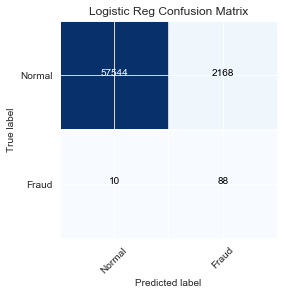

In [94]:
plot_confusion_matix(y_val, y_pred, ['Normal', "Fraud"], 'Logistic Reg')

In [89]:
def roc_plot(model,X_train_smote,y_train_smote,X_val,y_val):
    train_prob = model.predict_proba(X_train)[:,1]
    val_prob = model.predict_proba(X_val)[:,1]
    plt.figure(figsize=(7,7))
    for data in [[y_train, train_prob],[y_val, val_prob]]: # ,[y_test, test_prob]
        fpr, tpr, threshold = roc_curve(data[0], data[1])
        plt.plot(fpr, tpr)
    annot(fpr, tpr, threshold)
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.ylabel('TPR (power)')
    plt.xlabel('FPR (alpha)')
    plt.legend(['train','val'])
    plt.show()

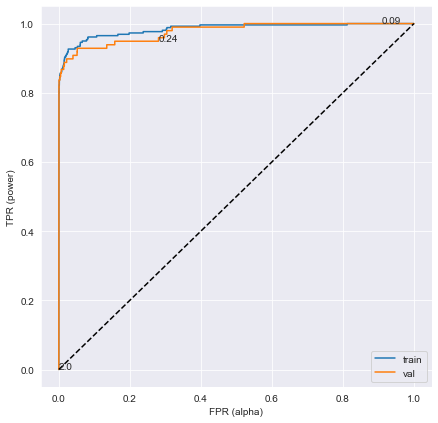

In [90]:
roc_plot(best_model, X_train,y_train,X_val,y_val)

## Threshold Selection

In [65]:
prevalence = df['Class'].sum()/df.shape[0]
fraud_cost_coef = 122.21132113821139
normal_cost_coef = 88.29102242231328

In [66]:
def treshold_selection(prevalence, mean_cost_fraud, mean_cost_Nfraud, y_val, y_pred):
    fpr, tpr, threshold = roc_curve(y_val, y_pred)
    cnf_matrix = confusion_matrix(y_val, y_pred)
    TP, FP, FN, TN = cnf_matrix[0][0], cnf_matrix[0][1], cnf_matrix[1][0], cnf_matrix[1][1]
    
    m = ((1-prevalence)/prevalence) * ((mean_cost_Nfraud*(FP - TN))/(mean_cost_fraud*(FN - TP)))
    
    fm = tpr - (m * fpr)
    
    opt = pd.DataFrame(data=fm)
    
    return opt

In [67]:
treshold_selection(prevalence, fraud_cost_coef, normal_cost_coef, y_val, y_pred)

,0
0,0.000000
1,1.481223
2,16.589903


## Feature Importance

In [60]:
features = pd.DataFrame(best_model.feature_importances_, index=[X_tv.columns], columns=['Importance'])
features = features.loc[features['Importance'] != 0]
features

AttributeError: 'Pipeline' object has no attribute 'feature_importances_'

In [62]:
# dir(best_model)

# ADASYN Model

In [55]:
gs_lr.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   27.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('clf',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=False,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                                           random_state=123,
                                                 

In [57]:
best_model = gs_lr.best_estimator_
print(gs_lr.best_params_)

{'clf__C': 1.0}
